## Задача 1
Ваш продукт - это школа английского языка Лендинг для языковой школы https://english22.tilda.ws/. Проанализируйте
конкурентов на рынке (SkyEng, Lingvoleo и прочие) и сформулируйте гипотезу по
улучшению первого экрана лендинг

Предлагаю учесть следующие аспекты:

Гипотеза: Добавление информации по вариантам обучения, типам курсов, ценам, удобная форма регистрации, варианты оплаты и больше "Ценностей" на первом экране лендинга улучшит конверсию на 5% и уменьшит отказы пользователей на 30% в течение первого месяца после изменений, в целом улучшит пользвательский опыт и вовлеченность.

Элементы, которые могут быть добавлены или улучшены на лендинге:
1. Информация по вариантам обучения и типам курсов: Пользователи должны четко понимать, какие курсы предлагает школа, и какие методики обучения используются.
   
2. Цены и варианты оплаты: Предоставление прозрачной информации о ценах и возможностях оплаты поможет пользователям принять быстрые решения о выборе курсов.

3. Удобная форма регистрации: Замена кнопки "Попробовать" на удобную форму регистрации с полями для получения демо версии курса или доступа к материалам сделает процесс регистрации более простым и удобным для пользователей.

4. Больше "Ценностей": Добавление информации о преимуществах обучения в вашей школе, отзывов учеников, достижениях, результаты обучения, сравнение с конкурентами поможет привлечь внимание и убедить пользователей в выборе вашей школы.

Для достижения этой цели предлагается завершить изменения на лендинге в течение месяца с момента объявления гипотезы. Завершение изменений на лендинге позволит быстро запустить улучшенную версию и начать оценку их эффективности.

## Задача 2
 Подведите результаты эксперимента в экселе по следующим данным: ab_stats.csv 
Стат значимо ли отличается ARPPU в двух группах ? Какие рекомендации дадите
менеджеру?


In [67]:
import pandas as pd

# Считываем CSV файл
df = pd.read_csv('ab_stats.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23652 entries, 0 to 23651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        23652 non-null  float64
 1   num_purchases  23652 non-null  int64  
 2   purchase       23652 non-null  int64  
 3   ab_group       23652 non-null  object 
 4   av_site visit  23652 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 924.0+ KB


In [68]:
count_group_A = df[df['ab_group'] == 'A'].shape[0]
count_group_B = df[df['ab_group'] == 'B'].shape[0]

print(f"Количество строк в группе A: {count_group_A}")
print(f"Количество строк в группе B: {count_group_B}")


Количество строк в группе A: 11835
Количество строк в группе B: 11817


Разное количество строк говорит о неравномерном разделении на группы...

In [69]:
df.describe()

,revenue,num_purchases,purchase,av_site visit
count,23652.000000,23652.000000,23652.000000,23652.000000
mean,0.324689,0.043590,0.020717,7.013112
std,9.557730,1.079403,0.142438,3.154584
min,0.000000,0.000000,0.000000,-12.073486
25%,0.000000,0.000000,0.000000,5.173787
50%,0.000000,0.000000,0.000000,7.007936
75%,0.000000,0.000000,0.000000,8.864119
max,1303.609284,152.000000,1.000000,22.446822


Отрицательные результаты в среднем времени посещения  - данные вызывают болшьшие вопросы, возможно не корректны
так же достаточно сильно раззбросаны

In [70]:
revenue_A = df.loc[df['ab_group'] == 'A', 'revenue'].sum()
revenue_B = df.loc[df['ab_group'] == 'B', 'revenue'].sum()

print(f"Выручка в группе А = {revenue_A}, в то время как выручка в группе B = {revenue_B}")
num_purch_A = df.loc[df['ab_group'] == 'A', 'purchase'].sum()
num_purch_B = df.loc[df['ab_group'] == 'B', 'purchase'].sum()
print(f"Платящих пользователей в группе А= {num_purch_A}, в то время как в группе B = {num_purch_B}")

num_purch_prod_A = df.loc[df['ab_group'] == 'A', 'num_purchases'].sum()
num_purch_prod_B = df.loc[df['ab_group'] == 'B', 'num_purchases'].sum()
print(f"Количество купленных продуктов  в группе А= {num_purch_prod_A}, в то время как количество купленных прдуктов в группе B = {num_purch_prod_B}")



# Сравнение ключевых показателей для группы 'A' и 'B'
if revenue_A > revenue_B and num_purch_A > num_purch_B and num_purch_prod_A > num_purch_prod_B:
    print("Группа A показывает лучшие результаты по выручке и количеству покупок.")
elif revenue_B > revenue_A and num_purch_B > num_purch_A and num_purch_prod_A > num_purch_prod_B:
    print("Группа B показывает лучшие результаты по выручке и количеству покупок.")
else:
    print("Результаты AB теста показывают смешанные результаты.")
    
    
# ARPPU для группы A
arppu_group_A = revenue_A / num_purch_A # выручка а на количество платящих польщователей

# ARPPU для группы B
arppu_group_B = revenue_B / num_purch_B

print(f"ARPPU для группы A: {arppu_group_A}")
print(f"ARPPU для группы B: {arppu_group_B}")



Выручка в группе А = 4786.807972, в то время как выручка в группе B = 2892.7357889999985
Платящих пользователей в группе А= 256, в то время как в группе B = 234
Количество купленных продуктов  в группе А= 600, в то время как количество купленных прдуктов в группе B = 431
Группа A показывает лучшие результаты по выручке и количеству покупок.
ARPPU для группы A: 18.698468640625
ARPPU для группы B: 12.36211875641025


В группе А исследуемая метрика выше

In [71]:
# Проверим статистическую значимость
from scipy import stats

# Выполнение t-теста для выручки
t_statistic_revenue, p_value_revenue = stats.ttest_ind(revenue_A, revenue_B)

# Выполнение t-теста для количества покупок
t_statistic_purchase, p_value_purchase = stats.ttest_ind(num_purch_A, num_purch_B)

# Выполнение t-теста для количества купленных продуктов
t_statistic_purchase_num, p_value_purchase_num = stats.ttest_ind(num_purch_prod_A, num_purch_prod_B)

# Выполнение t-теста для количества купленных продуктов
t_statistic_arppu, p_value_arppu= stats.ttest_ind(arppu_group_A, arppu_group_B)

# Оценка статистической значимости
alpha = 0.05
if p_value_revenue < alpha:
    print("Статистически значимые различия между группами по выручке.")
else:
    print("Нет статистически значимых различий между группами по выручке.")
if p_value_purchase < alpha:
    print("Статистически значимые различия между группами по количеству покупок.")
else:
    print("Нет статистически значимых различий между группами по количеству покупок.")
if p_value_purchase_num < alpha:
    print("Статистически значимые различия между группами по количеству купленных продуктов.")
else:
    print("Нет статистически значимых различий между группами по количеству купленных продуктов.")
if p_value_arppu < alpha:
    print("Статистически значимые различия между группами по arppu.")
else:
    print("Нет статистически значимых различий между группами по arppu.")


Нет статистически значимых различий между группами по выручке.
Нет статистически значимых различий между группами по количеству покупок.
Нет статистически значимых различий между группами по количеству купленных продуктов.
Нет статистически значимых различий между группами по arppu.


C:\Users\admin\AppData\Local\Temp/ipykernel_6832/2020914820.py:5: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic_revenue, p_value_revenue = stats.ttest_ind(revenue_A, revenue_B)
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\admin\AppData\Local\Temp/ipykernel_6832/2020914820.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be u

## Посмотрим график

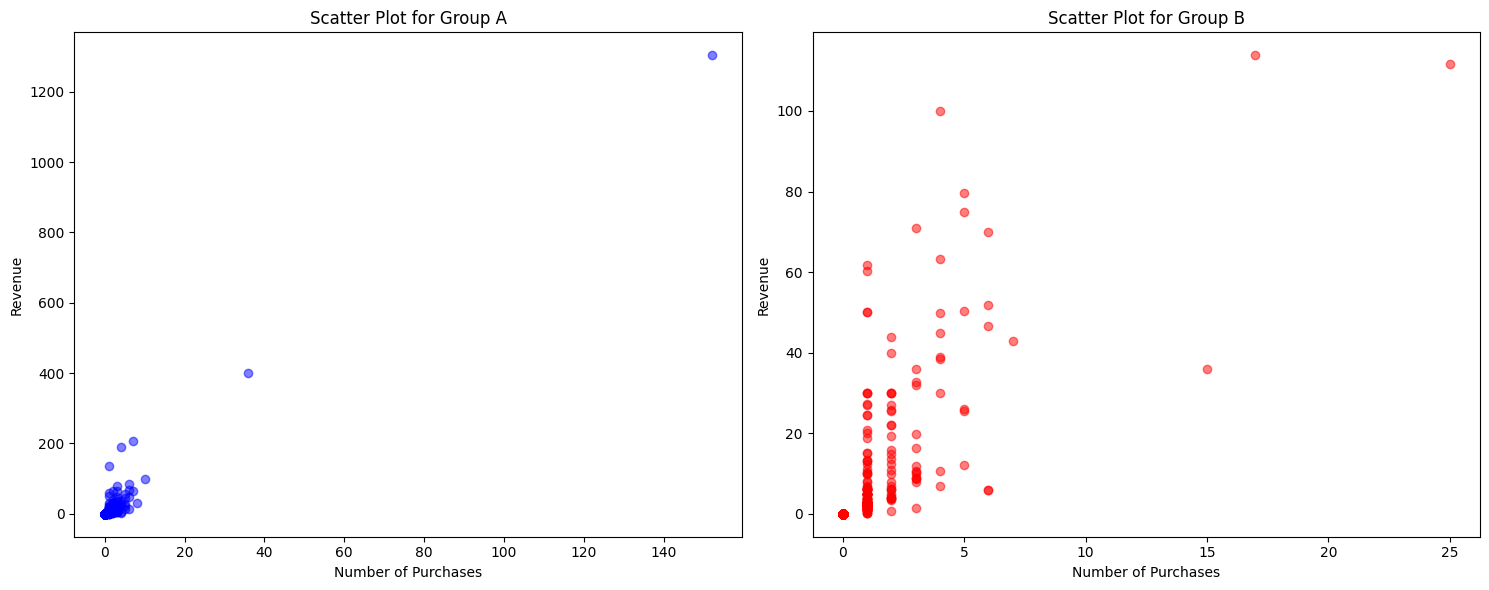

In [72]:
import matplotlib.pyplot as plt

# Выберем данные только для группы 'A' и 'B'
data_group_A = df[df['ab_group'] == 'A']
data_group_B = df[df['ab_group'] == 'B']

# Создадим два scatter plot для столбцов 'revenue' и 'num_purchases' для групп 'A' и 'B'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# График для данных группы 'A'
ax1.scatter(data_group_A['num_purchases'], data_group_A['revenue'], color='b', alpha=0.5)
ax1.set_xlabel('Number of Purchases')
ax1.set_ylabel('Revenue')
ax1.set_title('Scatter Plot for Group A')

# График для данных группы 'B'
ax2.scatter(data_group_B['num_purchases'], data_group_B['revenue'], color='r', alpha=0.5)
ax2.set_xlabel('Number of Purchases')
ax2.set_ylabel('Revenue')
ax2.set_title('Scatter Plot for Group B')

# Покажем оба графика рядом
plt.tight_layout()
plt.show()

Очевидно, что датасет содержит выбросы.  Одна из покупок , где клиент приобрел 152 продукта и принес прибыли 1300, фактически и отображает разницу между группами а и б. В то время как покупки в группе б более мелкие по сумме и по количеству выбранных продуктов. В целом, данные о количестве купленных продуктов группы а находятся в таком же диапазоне как и в группе б

In [73]:
# Сколько в среднем покупали за один заказ в каждой из групп?
avg_purch_prod_A = df.loc[(df['ab_group'] == 'A') & (df['purchase'] == 1), 'num_purchases'].mean()
avg_purch_prod_B = df.loc[(df['ab_group'] == 'B') & (df['purchase'] == 1), 'num_purchases'].mean()

print(f"В среднем количество покупок за один заказ в группе A = {avg_purch_prod_A}, в то время как в группе B = {avg_purch_prod_B}")


В среднем количество покупок за один заказ в группе A = 2.34375, в то время как в группе B = 1.8418803418803418


In [74]:
print(f"Разница в прибыли между группами а и б = {abs(revenue_A-revenue_B)}")

Разница в прибыли между группами а и б = 1894.0721830000011


In [75]:
all_purchases = df['num_purchases'].sum()
print(f"Разница в количестве купленных продуктов между группами а и б = {abs(num_purch_A-num_purch_B)}")
print(f" Что составляет всего {abs(num_purch_A-num_purch_B)} % от всего количества покупок")

Разница в количестве купленных продуктов между группами а и б = 22
 Что составляет всего 22 % от всего количества покупок


## Удалим выбросы

In [76]:
cleaned_data = df.loc[df['num_purchases'] < 30]

In [77]:
# Выберем данные только для группы 'A' и 'B, где количество продуктов будет меньше 30 (наши выбросы)'
data_group_A = cleaned_data.loc[(cleaned_data['ab_group'] == 'A') & (cleaned_data['num_purchases'] < 30)]
data_group_B = cleaned_data.loc[(cleaned_data['ab_group'] == 'B') & (cleaned_data['num_purchases'] < 30)]

In [78]:
data_group_A.head()

,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814


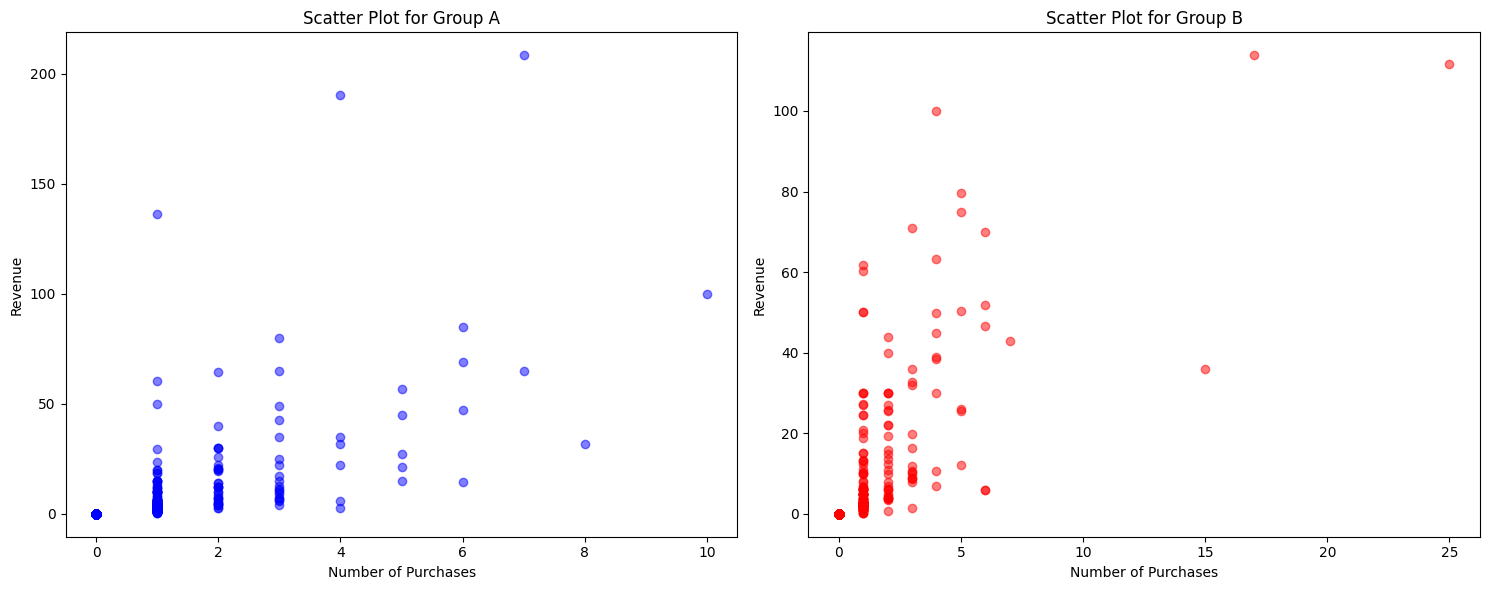

In [79]:
# Создадим два scatter plot для столбцов 'revenue' и 'num_purchases' для групп 'A' и 'B'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# График для данных группы 'A'
ax1.scatter(data_group_A['num_purchases'], data_group_A['revenue'], color='b', alpha=0.5)
ax1.set_xlabel('Number of Purchases')
ax1.set_ylabel('Revenue')
ax1.set_title('Scatter Plot for Group A')

# График для данных группы 'B'
ax2.scatter(data_group_B['num_purchases'], data_group_B['revenue'], color='r', alpha=0.5)
ax2.set_xlabel('Number of Purchases')
ax2.set_ylabel('Revenue')
ax2.set_title('Scatter Plot for Group B')

# Покажем оба графика рядом
plt.tight_layout()
plt.show()

Рассчитаем наши показатели без 2 транзакций (выбросы в группе А)

In [80]:
revenue_A = cleaned_data.loc[cleaned_data['ab_group'] == 'A', 'revenue'].sum()
revenue_B = cleaned_data.loc[cleaned_data['ab_group'] == 'B', 'revenue'].sum()

print(f"Выручка в группе А = {revenue_A}, в то время как выручка в группе B = {revenue_B}")
num_purch_A = cleaned_data.loc[cleaned_data['ab_group'] == 'A', 'purchase'].sum()
num_purch_B = cleaned_data.loc[cleaned_data['ab_group'] == 'B', 'purchase'].sum()
print(f"Платящих пользователей в группе А= {num_purch_A}, в то время как в группе B = {num_purch_B}")
# ARPPU для группы A без выбросов
arppu_group_A = revenue_A / num_purch_A # выручка а на количество платящих польщователей

# ARPPU для группы B без выбросов
arppu_group_B = revenue_B / num_purch_B
print(f"ARPPU для группы A: {arppu_group_A}, ARPPU для группы B: {arppu_group_B}")



Выручка в группе А = 3081.5586879999996, в то время как выручка в группе B = 2892.7357889999985
Платящих пользователей в группе А= 254, в то время как в группе B = 234
ARPPU для группы A: 12.132120818897636, ARPPU для группы B: 12.36211875641025


После удаления двух покупок, которые могут быть случайными,  мы видим, что в результаты практически идентичны.
В группе Б исследуемый показатель даже Выше.
Стоит учесть плохое качество данных и большее количество пользователей в группе А

Не вижу с статистически важных различий между группами. 

На текущий момент гипотеза B отклонена, но и о стопроцентной победе группы А речи быть не может, так как, как минимум одна из транзакций, повлиявшей на прибыль  может быть случайной .

## 3) Кейс
Мы хотим провести А/Б-тест для трех источников трафика. Нынешняя конверсия равна 5%,
мы ожидаем прирост в 0,2%.
Уровень доверия 97% и уровень мощности 87%.
Всего на наш продукт заходит 40 000 пользователей в месяц.


## 3.1) Задача
За сколько дней мы сможем протестировать гипотезу? И что вы можете посоветовать по
результатам подсчета?

In [86]:
# Рассчитаем размер выборки
from scipy.stats import norm
import math

# Входные данные
alpha = 0.03  # Уровень доверия
beta = 0.13  # Мощность теста
p1 = 0.05  # Текущая конверсия
p2 = 0.052  # Предполагаемая новая конверсия
effect_size = p2 - p1  # Размер эффекта

# Рассчитываем критические значения Z
z_alpha = norm.ppf(1 - alpha/2)
z_beta = norm.ppf(1 - beta)

# Рассчитываем размер выборки для каждой группы

# Группа
sample_size_group1 = ((z_alpha + z_beta) ** 2 * (p1 * (1 - p1) + p2 * (1 - p2))) / effect_size ** 2


# Общий размер выборки для трех групп
total_sample_size = math.ceil(sample_size_group1)*3

# Вывод результатов
print(f"Размер выборки для группы {math.ceil(sample_size_group1)}")
print(f"Общий размер выборки для трех групп: {total_sample_size}")

print(f"Для эксперимента необходимо {total_sample_size/40000} месяцев")

Размер выборки для группы 262966
Общий размер выборки для трех групп: 788898
Для эксперимента необходимо 19.72245 месяцев


Слишком долгое тестирование для такого небольшого изменения параметра. Лучше выбрать другую гипотезу для тестирования

## 3.2)  Задача
Допустим в задаче нет проблемы с количеством посетителей на сайт, тогда подведите
результаты тестирования, если у нас следующие результаты по количеству конверсии:
1) 25 000
2) 30 000
3) 32 000

In [91]:

from statsmodels.stats.proportion import proportions_ztest
# Данные
conversions_a = 25000
conversions_b = 30000
conversions_c = 32000
total_sample_size = 700000
group_size = total_sample_size/3

# Пропорции конверсий для каждой группы
prop_a = conversions_a / group_size
prop_b = conversions_b / group_size
prop_c = conversions_c / group_size

# Проводим z-тест для разности пропорций между группами AB
z_statistic_ab, p_value_ab = proportions_ztest([conversions_a, conversions_b], [total_sample_size, total_sample_size])

# Проводим z-тест для разности пропорций между группами AC
z_statistic_ac, p_value_ac = proportions_ztest([conversions_a, conversions_c], [total_sample_size, total_sample_size])

# Проводим z-тест для разности пропорций между группами BC
z_statistic_bc, p_value_bc = proportions_ztest([conversions_b, conversions_c], [total_sample_size, total_sample_size])

# Определяем статистически значимые отличия
alpha = 0.05

significant_differences = []
if p_value_ab < alpha:
    significant_differences.append("AB")
if p_value_ac < alpha:
    significant_differences.append("AC")
if p_value_bc < alpha:
    significant_differences.append("BC")

# Вывод результатов
if not significant_differences:
    print("Статистически значимых различий не обнаружено.")
else:
    print(f"Обнаружены статистически значимые различия в группах: {', '.join(significant_differences)}.")

# Определяем наилучший результат
best_result = min(p_value_ab, p_value_ac, p_value_bc)

if best_result == p_value_ab:
    print("Лучший результат достигнут в группе AB.")
elif best_result == p_value_ac:
    print("Лучший результат достигнут в группе AC.")
else:
    print("Лучший результат достигнут в группе BC.")


Обнаружены статистически значимые различия в группах: AB, AC, BC.
Лучший результат достигнут в группе AC.


In [92]:
alpha = 0.05

if p_value_bc < alpha:
    print("Обнаружены статистически значимые различия между группами B и C.")
else:
    print("Статистически значимых различий между группами B и C не обнаружено.")


Обнаружены статистически значимые различия между группами B и C.


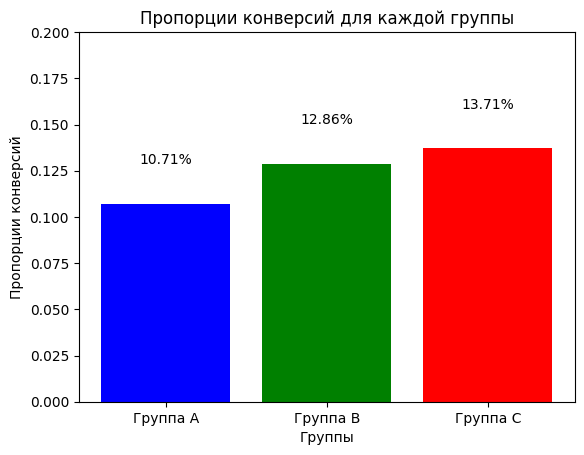

In [95]:
import matplotlib.pyplot as plt

# Ваши данные
groups = ['Группа A', 'Группа B', 'Группа C']
props = [prop_a, prop_b, prop_c]

# Создаем столбчатую диаграмму
plt.bar(groups, props, color=['blue', 'green', 'red'])
plt.xlabel('Группы')
plt.ylabel('Пропорции конверсий')
plt.title('Пропорции конверсий для каждой группы')
plt.ylim(0, 0.2)  # Устанавливаем ограничение для оси y от 0 до 0.2

# Добавляем лейблы к каждому столбцу
for i, prop in enumerate(props):
    plt.text(i, prop + 0.02, f'{prop:.2%}', ha='center', va='bottom')

plt.show()



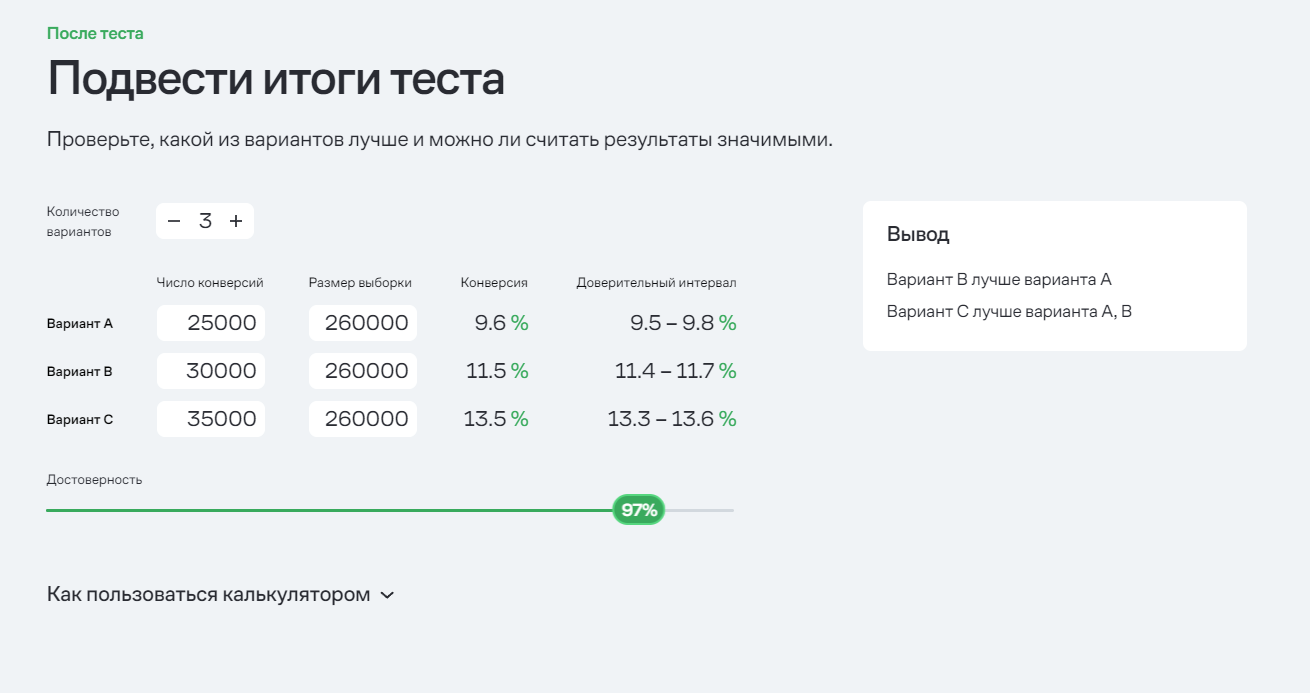

In [90]:
from IPython.display import Image

Image(filename='test.png')


Соотвественно мы примем вариант С.

## 4) Кейс
Вы решили сравнивать метрику CPA в двух группах. 
Размер выборки - 2350 элементов в каждой группе.
Для проверки нормальности распределения на выборке в 2350 наблюдений применили ,
критерий Шапиро-Уилка и получили p-value, равный 0.00002, alpha = 5%.
Какой бы вывод мы могли сделать в данном случае?
В этом случае какой статистический критерий для проверки первоначальной гипотезы тут лучше
всего подойдёт и почему ?

#### *Ответ*:
Процедура теста Шапиро-Уилка заключается в том, чтобы сравнить наблюдаемые данные с тем, что ожидалось бы в случае нормального распределения. Нулевая гипотеза (H0) этого теста заключается в том, что данные распределены нормально. Если p-value, полученное при тестировании, меньше уровня значимости (в данном случае, 0.05), то мы отклоняем нулевую гипотезу и делаем вывод о ненормальности распределения данных.
Можно провести и дополнительные тесты, так как тест Шапиро Уилка чувствителен даже к минимальным отклонениям от нормальности распределения. Так или иначе, тест показал,  что распределение не является номальным( мы должны отклонить нулевую гипотезу, так как имеются статистически знаячимые различия между группами)
 Таким образом, в данном случае, когда нормальность распределения не удовлетворена, рекомендуется использовать непараметрический тест, такой как U-критерий Манна-Уитни, для сравнения CPA между двумя группам так как этот тест не требует нормальности данных и подходит для ранжированных данных

## 5) Мы провели АБ-тест на увеличение average timespent per user. По итогам тестирования мы получили следующие данные. 

Является ли результат статистически значимым с уровнем доверия 80%? Какую версию мы выкатим на продакшн?


A) Средняя - 360, отклонение - 40, количество - 9802

B) Средняя - 352, отклонение - 58, количество - 9789

Для оценки статистической значимости различий между двумя средними значениями воспользуемся t-тестом для независимых выборок. 

Однако перед этим важно проверить предположение о нормальности распределения данных.

Давайте проверим предположение о нормальности с использованием t-теста. 

Уровень доверия 80% соответствует значению alpha равному (1 - 0.80) = 0.20. 
**Обычно уровень значимости alpha принимают равным 0.05, но в данном случае мы будем использовать 0.20.**

Для каждой версии данных (A и B), вычислим 80%-ный доверительный интервал для среднего времени проведенного пользователем и проверим, пересекаются ли эти интервалы. 
Если они пересекаются, это может указывать на отсутствие статистической значимости различий между версиями.

 Доверительный интервал = M ± Z * (SD / √n):

Для версии A:
Среднее (M) = 360
Отклонение (SD) = 40
Количество (n) = 9802
Уровень доверия (CI) = 80%


Для версии B:
Среднее (M) = 352
Отклонение (SD) = 58
Количество (n) = 9789
Уровень доверия (CI) = 80%

Доверительные интервалы используются для оценки неопределенности вокруг среднего значения в выборке. При сравнении двух доверительных интервалов мы можем определить, насколько уверены мы в том, что средние значения в этих выборках действительно различаются.

Если доверительные интервалы не пересекаются, это может быть признаком того, что средние значения в этих группах статистически различаются. Однако, это не является формальным доказательством статистической значимости.

Чтобы провести более формальное статистическое тестирование различий, мы можем  дополниетльно использовать t-тест. 




In [10]:
import scipy.stats as stats
import numpy as np

def calculate_confidence_interval(mean, std_dev, n, confidence_level):
    margin_of_error = stats.norm.ppf((1 + confidence_level) / 2) * (std_dev / np.sqrt(n))
    return mean - margin_of_error, mean + margin_of_error

def compare_intervals(interval_A, interval_B):
    if interval_A[1] >= interval_B[0] and interval_A[0] <= interval_B[1]:
        return "Доверительные интервалы пересекаются. Нет статистически значимых различий."
    else:
        return "Доверительные интервалы не пересекаются. Есть статистически значимые различия."

# Данные для версии A
mean_A = 360
std_dev_A = 40
n_A = 9802

# Данные для версии B
mean_B = 352
std_dev_B = 58
n_B = 9789

# Уровень доверия
confidence_level = 0.80

# Вычисление доверительных интервалов
confidence_interval_A = calculate_confidence_interval(mean_A, std_dev_A, n_A, confidence_level)
confidence_interval_B = calculate_confidence_interval(mean_B, std_dev_B, n_B, confidence_level)

# Вывод результатов
print("Доверительный интервал для версии A:", confidence_interval_A)
print("Доверительный интервал для версии B:", confidence_interval_B)

# Проверка пересечения интервалов
print(compare_intervals(confidence_interval_A, confidence_interval_B))

# Т-тест
t_stat, p_value = stats.ttest_ind_from_stats(mean_A, std_dev_A, n_A, mean_B, std_dev_B, n_B, equal_var=False)

# Вывод p-значения
print("p-значение т-теста:", p_value)

# Проверка статистической значимости
alpha = 1 - confidence_level
if p_value < alpha:
    if mean_A > mean_B:
        print("Версия A показывает более высокое среднее время проведенное пользователем на странице.")
    else:
        print("Версия B показывает более высокое среднее время проведенное пользователем на странице.")




Доверительный интервал для версии A: (359.4822278012386, 360.5177721987614)
Доверительный интервал для версии B: (351.24873195814786, 352.75126804185214)
Доверительные интервалы не пересекаются. Есть статистически значимые различия.
p-значение т-теста: 3.397782878412232e-29
Версия A показывает более высокое среднее время проведенное пользователем на странице.


## 6) Создайте техническую архитектуру проекта по аб тестированию продукта он-лайн кинотеатра
с учетом кросс-девайс аналитики по следующей гипотезе:
Если договориться с банком о 99% кэшбэке на подписку первого месяца, то это повысит
конверсию в подписку на 30%, благодаря упрощенному принятию решения со стороны
пользователя.
На схеме необходимо отобразить:
1) Управленческий процесс по договоренностям с внешними партнерами
2) Архитектуру данных с указанием систем, из которых будем скачивать данные
3) Внутрикомандное взаимодействие